In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Gemetria tényező számítása RADTEL
Az analitikus számolások J.D. Sullivan GEOMETRICAL FACTOR AND DIRECTIONAL RESPONSE OF SINGLE AND MULTI-ELEMENT PARTICLE TELESCOPES 1971-es cikkje alapján készült.

In [2]:
#detekorlemezek távolsága a középvonaltól számítva
l=[12.2,12.25,7.525,2.25,8.025,10.3]#mm

In [3]:
# két végtelenül vékony körlap tedektor geometriai tényezője
def G_two (l):
    #detektorok sugara
    r1=10
    r2=10    
    G=0.5* pi **2 *(r1**2+r2**2+l**2-sqrt((r1**2+r2**2+l**2)**2-4*r1**2*r2**2))
    return G

In [4]:
#1 távolság
for i in range(len(l)):
    print(G_two(l[i]))

311.02340742794644
309.6993626535435
472.87940941768596
788.475933612333
451.3479848332699
367.03393329294096


In [5]:
#D1-hez az összes
L=l[0]
for i in range(len(l)-1):
    L=L+l[i+1]
    print(G_two(L))

125.71708354374177
81.28720885587444
72.35677702056326
49.84618413102779
33.36442674956373


In [6]:
#D2-hez az összes
L=l[1]
for i in range(len(l)-2):
    L=L+l[i+2]
    
    print( G_two(L))

172.05901292437997
147.26813002776217
90.22726203609245
54.1501688855607


In [7]:
#az összes koincidencia
for j in range(len(l)):
    L=l[j]
    for i in range(len(l)-(j+1)):
        L=L+l[i+(j+1)]

        print( G_two(L))
    print('----------------------')

125.71708354374177
81.28720885587444
72.35677702056326
49.84618413102779
33.36442674956373
----------------------
172.05901292437997
147.26813002776217
90.22726203609245
54.1501688855607
----------------------
384.66624476455956
198.7005614519159
100.77198070952298
----------------------
367.8508083210315
162.63606311138886
----------------------
191.1075614730307
----------------------
----------------------


In [27]:
#Hengernek tekintve a detektort vastagságával együtt G=pi*felület
def det_henger (h):
    d=20
    return pi*(2*(d/2)**2*pi+d*pi*h)

## Különböző detektorok geometriai tényezője

In [28]:
print(det_henger(0.3))
print(det_henger(0.1))
print(det_henger(1.5))
print(det_henger(3.5))
print(det_henger(0.5))

2033.138506624408
1993.6600890200502
2270.0090122505526
2664.793188294127
2072.616924228765


# Directional response

In [34]:
def A_two_element(r1,r2,l,teth): #teth radianban
    tet_c=0
    tet_m=math.atan(r1+r2)/l
    
    A_w=0
    if (teth <= tet_m and tet_c<= teth):
        f1=(l**2*tan(teth)**2)/(2*l*r2*tan(teth))
        f2=(r2**2+(l**2*tan(teth)**2)-r1**2)/(2*l*r2*tan(teth))
        F1=math.acos(f1)
        F2=math.acos(f2)
        A_w=cos(teth)*(0.5*r1**2*(2*F1-(sin(2*F1))+(0.5*r2**2*(2*F2-(sin(2*F2))))))
                
    return A_w

In [35]:
#test mm
#theta itt tetszőleges választás
A_two_element(10,10,12.2,radians(5))

7438.551256098756

<ipython-input-34-816332f22293>:7: RuntimeWarning: invalid value encountered in double_scalars
  f1=(l**2*tan(teth)**2)/(2*l*r2*tan(teth))
<ipython-input-34-816332f22293>:8: RuntimeWarning: invalid value encountered in double_scalars
  f2=(r2**2+(l**2*tan(teth)**2)-r1**2)/(2*l*r2*tan(teth))


Text(0.5, 1.0, 'D1-D2 detektor directional response coincidence')

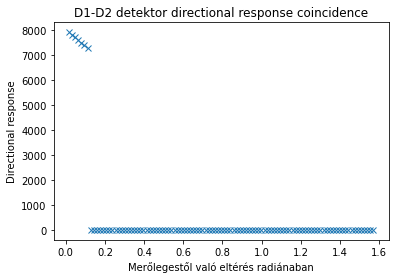

In [39]:
tethx=linspace(radians(0),radians(90),100)
A_y=[]
for i in range(100):
    A_y.append(A_two_element(10,10,12.2,tethx[i]))
    
plot(tethx,A_y,'x')  
xlabel('Merőlegestől való eltérés radiánaban')
ylabel('Directional response')
title('D1-D2 detektor directional response coincidence')